In [15]:
import pandas as pd
import numpy as np

In [26]:
import re
from nltk.corpus import wordnet

In [2]:
df=pd.read_csv("task-1/data/train.csv")

In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            404287 non-null  bool 
 1   qid1          404287 non-null  bool 
 2   qid2          404287 non-null  bool 
 3   question1     404287 non-null  bool 
 4   question2     404287 non-null  bool 
 5   is_duplicate  404287 non-null  bool 
dtypes: bool(6)
memory usage: 5.4 MB


<AxesSubplot:>

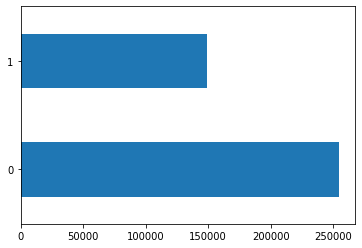

In [14]:
df.is_duplicate.value_counts().plot(kind="barh")

In [24]:
uniq=len(np.unique(df.qid1.unique().tolist()+df.qid2.unique().tolist()))
uniq

537929

In [43]:
reg_patterns = [
   (r'won\'t', 'will not'),
   (r'can\'t', 'can not'),
   (r'i\'m', 'i am'),
   (r'(\w+)\'ll', '\g<1> will'),
   (r'(\w+)n\'t', '\g<1> not'),
   (r'(\w+)\'ve', '\g<1> have'),
   (r'(\w+)\'s', '\g<1> is'),
   (r'(\w+)\'re', '\g<1> are'),
]

In [29]:
def expand_words(text,patterns=reg_patterns):
   for (pattern, repl) in patterns:
      text = re.sub(pattern, repl, text)
   return text

In [31]:
expand_words("I can't do it")

'I cannot do it'

In [32]:
def replace_rep(word):

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'

    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)

    if repl_word != word:
        return replace_rep(repl_word)
    else:
        return repl_word

In [81]:
replace_rep("I am Heyy hiiiiiii")

'I am Hey hi'

In [45]:
def change_num(text):
    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    return text

In [88]:
def replace_spec(text):
    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')

    return text

In [83]:
change_num("hello 8,000,000,000 secs")

'hello 8b secs'

In [112]:
def remove_math(text):
    try:
        a=text.split("[math]")
        b=a[1].split("[/math]")
        res=a[0] + b[1]
        text=" ".join(res.split())  
    except IndexError:
        return text
    return text

In [111]:
remove_math("[math]23^{24}[/math]")

''

In [84]:
def remove_punc(text):
    pattern = re.compile('\W')
    text = re.sub(pattern, ' ', text).strip()

    return text

In [109]:
def preprocess(text):
    text=str(text).lower()
    text=expand_words(text)
    text=replace_rep(text)
    text=change_num(text)
    text=replace_spec(text)
    text=remove_math(text)
    text=remove_punc(text)

    return text
    

In [113]:
%%time
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

CPU times: user 53.2 s, sys: 33.6 ms, total: 53.3 s
Wall time: 53.3 s


In [114]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinor koh i nor diamond,what would hapen if the indian government stol...,0
2,2,5,6,how can i increase the sped of my internet con...,how can internet sped be increased by hacking ...,0
3,3,7,8,why am i mentaly very lonely how can i solve it,find the remainder when is divided by 24 23,0
4,4,9,10,which one disolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [115]:
df.to_csv("task-1/data/cleaned_data.csv")